<center><img src="img/logo_hse.png" width="1000"></center>

<h1>
<center>Прикладные задачи анализа данных</center>
<center>Домашнее задание 1: Генеративные сети</center>
</h1>

## Введение

Не все же нам MNIST генерировать. Давайте посмотрим, как генеративные модели могут использоваться не только для развлечения. Поехали!

Немного вступления и мотивации, для чего мы хотим обучать модель.

### MAGIC – Major Atmospheric Gamma Imaging Cherenkov Telescope

MAGIC (Major Atmospheric Gamma Imaging Cherenkov) - это система, состоящая из двух черенковских телескопов диаметром 17 м. Они предназначены для наблюдения гамма-лучей от галактических и внегалактических источников в диапазоне очень высоких энергий (от 30 ГэВ до 100 ТэВ). 

MAGIC позволил открыть и исследовать новые классы источников гамма-излучения, таких как, например, пульсары и гамма-всплески (GRB).

<center><img src="img/magic1.jpg" width="1000"></center>

Источник: https://magic.mpp.mpg.de/

Youtube video: https://youtu.be/mjcDSR2vSU8

#### Ок, давайте зафиксируем. Какой-то крутой телескоп позволяет открыть новые виды излучения. Идем дальше.

### Частицы из космоса

Космические частицы, $\gamma$-кванты (фотоны) и адроны (протоны), взаимодействуют с атмосферой и порождают ливни вторичных частиц. Двигаясь с околосветовой скоростью, эти частицы излучают Черенковское излучение. Телескопы фотографируют это излучение. 
#### По фотографиям можно определить тип частицы из космоса: фотон или протон. Знакомая формулировка задачи, не правда ли?

<center><img src="img/shower.jpg" width="500"></center>

### Фотографии

Задача атмосферного черенковского телескопа - получить изображение ливня путем измерения черенковского света от частиц ливня. Это изображение представляет собой геометрическую проекцию ливня на детектор. Для анализа этих изображений были введены параметры изображения или так называемые параметры Хилласа. Ниже пример такой фотографии.

<center><img src="img/geo.jpg" width="400"></center>

#### Итак, каждая фотография описывается набором параметров, которые за нас считает телесоп. А что там с двумя видами частиц?

### Фотоны vs адронов

Изображения для $\gamma$-квантов (фотонов) и адронов (протонов) отличаются по форме кластеров. Астрономы используют модели машинного обучения для классификации этих изображений. Получение каждого такого изображения - дорогое удовольствие!


<center><img src="img/gamma_p.png" width="600"></center>

Для обучения моделей ученые искусственно генерируют такие изображения для каждого типа частиц с помощью сложных физических симуляторов. 

#### Итак, давайте сэкономим денег для ученых и сгенерируем хороших фотографий разных частиц. Используем для этого GAN и диффузионные модели!

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Данные

Будем использовать данные телескопа MAGIC из UCI репозитория https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope. Каждый объект в данных - параметры одного изображения кластера и метка этого кластера (фотон или адрон):


0. Length: major axis of ellipse [mm]
1. Width: minor axis of ellipse [mm]
2. Size: 10-log of sum of content of all pixels [in #phot]
3. Conc: ratio of sum of two highest pixels over fSize [ratio]
4. Conc1: ratio of highest pixel over fSize [ratio]
5. Asym: distance from highest pixel to center, projected onto major axis [mm]
6. M3Long: 3rd root of third moment along major axis [mm]
7. M3Trans: 3rd root of third moment along minor axis [mm]
8. Alpha: angle of major axis with vector to origin [deg]
9. Dist: distance from origin to center of ellipse [mm]
10. class: g,h # gamma (signal), hadron (background)

In [2]:
names = np.array([ "Length", "Width", "Size", "Conc", "Conc1", "Asym", "M3Long", "M3Trans", "Alpha", "Dist", "class" ])
data = pd.read_csv("data/magic04.data", header = None, names = names)
data

,Length,Width,Size,Conc,Conc1,Asym,M3Long,M3Trans,Alpha,Dist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


## Постановка задачи

Ваша задача заключается в том, чтобы с помощью генеративно-состязательных сетей научиться генерировать параметры кластеров на изображениях телескопа для каждого типа частиц (фотона или адрона):

- $X$ - матрица реальных объектов, которые нужно начиться генерировать;
- $y$ - метки классов, которые будем использовать как условие при генерации.

In [3]:
# параметры кластеров на изображениях
X = np.abs(data[names[:-1]].values)

# метки классов
labels = data[names[-1]].values
y = np.ones((len(labels), 1))
y[labels == "h"] = 0

print(X[:2])
print(y[:5])
print(np.unique(y))

[[2.87967e+01 1.60021e+01 2.64490e+00 3.91800e-01 1.98200e-01 2.77004e+01
  2.20110e+01 8.20270e+00 4.00920e+01 8.18828e+01]
 [3.16036e+01 1.17235e+01 2.51850e+00 5.30300e-01 3.77300e-01 2.62722e+01
  2.38238e+01 9.95740e+00 6.36090e+00 2.05261e+02]]
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]
[0. 1.]


## Визуализация данных

Каждое изображение описывается 10 параметрами. Давайте построим распределения значений каждого параметра для каждого типа частиц.

In [4]:
def plot_hists(X1, X2, names, label1, label2, bins = np.linspace(-3, 3, 61)):
    plt.figure(figsize = (5 * 4, 5 * 2))
    for i in range(X1.shape[1]):
        plt.subplot(3, 4, i + 1)
        plt.grid()
        plt.hist(X1[:, i], bins = bins, alpha = 0.3, label = label1, color = "C4")
        plt.hist(X2[:, i], bins = bins, alpha = 0.3, label = label2, color = "C0")
        plt.xlabel(names[i], size = 14)
        plt.legend(loc = "best")
    plt.tight_layout()

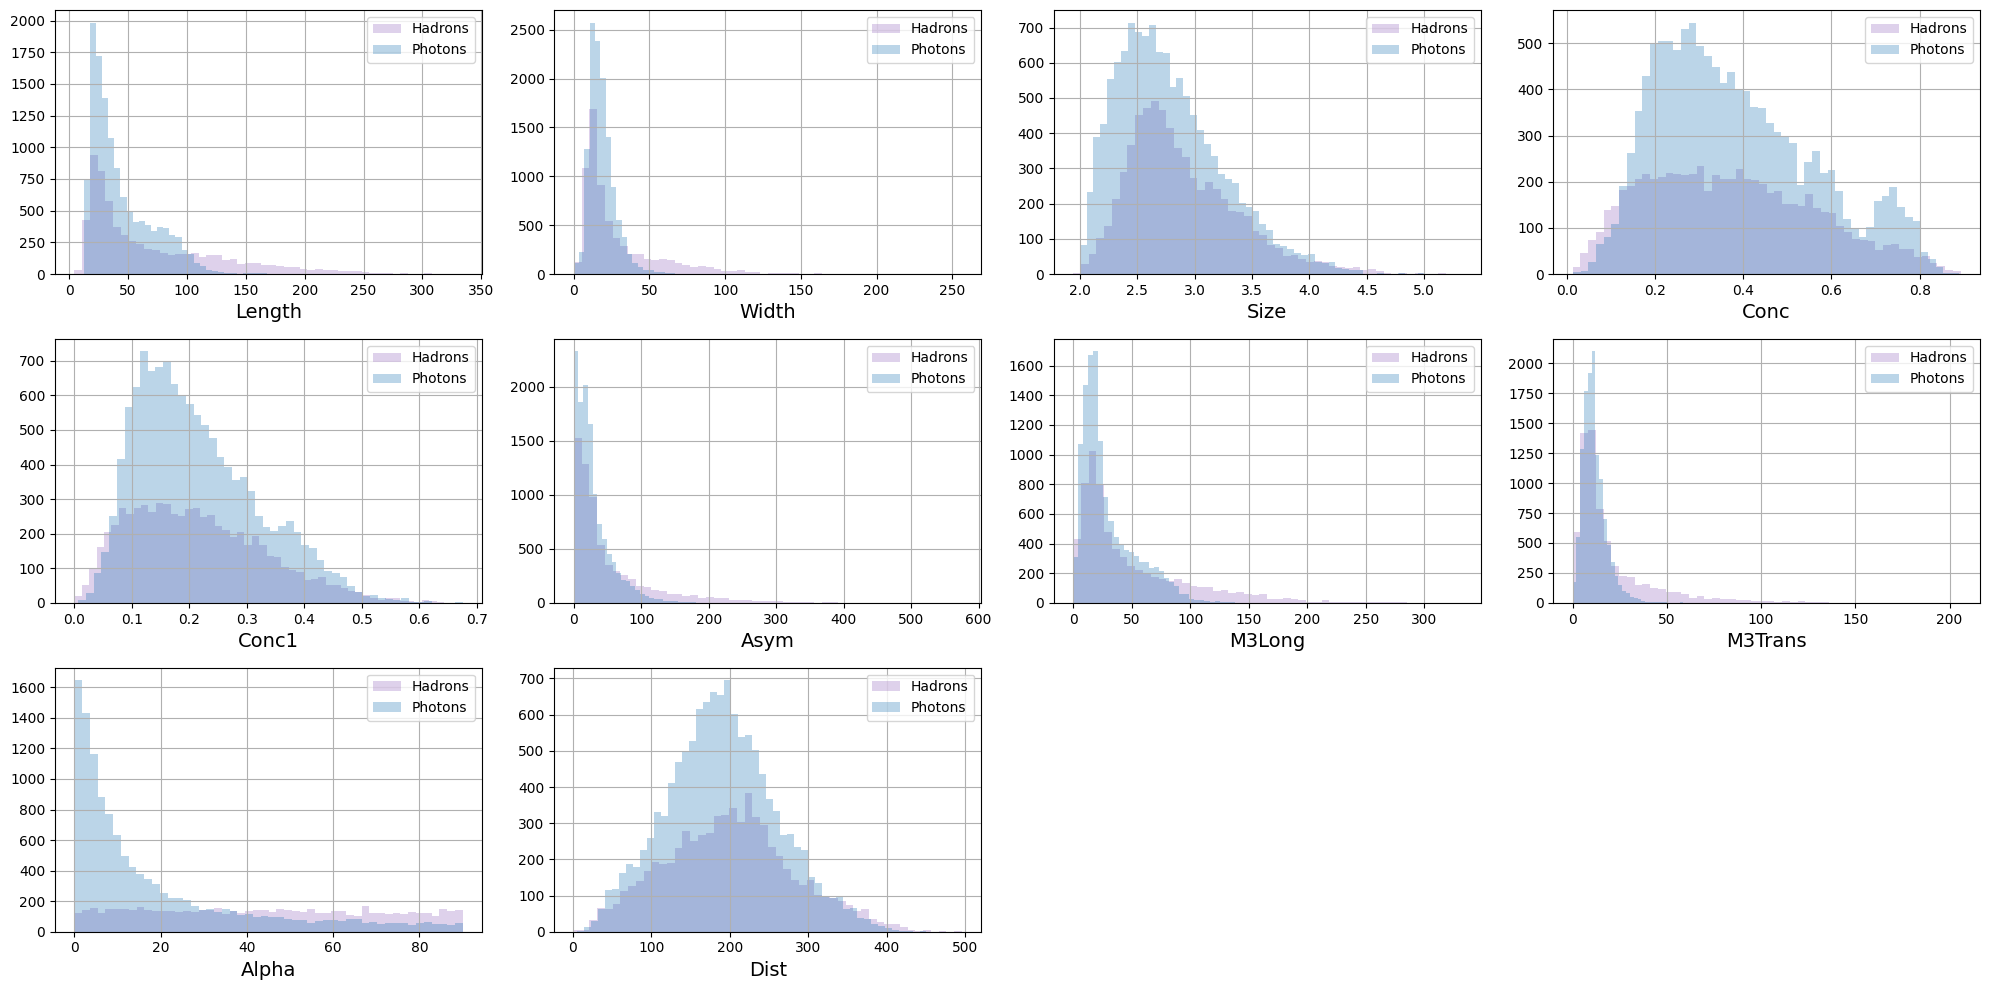

In [5]:
plot_hists(X[y[:, 0] == 0], X[y[:, 0] == 1], names, label1 = "Hadrons", label2 = "Photons", bins = 50)

## Предобработка данных

Из графика видим, что распределения для многих признаков имеют тяжелые хвосты. Это делает обучение генеративных моделей тяжелее. Поэтому нужно как-то преобразовать данные, чтобы убрать эти тяжелые хвосты.

### Обучающая и тестовая выборки

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.5, shuffle = True, random_state = 11)

### Задание 1 (0.2 балла)

Проиллюстрируйте распределение y внутри train и test выборки.

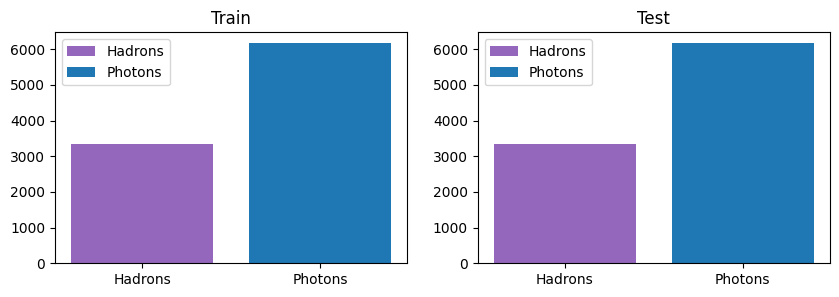

In [7]:
colors = [ 'C4', 'C0' ]
labels = [ "Hadrons", "Photons" ]
fig, axes = plt.subplots(1, 2, figsize = (10, 3))

axes[0].set_title("Train")
axes[0].bar(labels, np.unique(y_train, return_counts = True)[1], label = labels, color = colors)
axes[0].legend()

axes[1].set_title("Test")
axes[1].bar(labels, np.unique(y_test, return_counts = True)[1], label = labels, color = colors)
axes[1].legend()

### Задание 2 (0.8 балл)

Используя функцию `sklearn.preprocessing.QuantileTransformer` трансформируйте входные данные `X_train` и `X_test`. Это преобразование делает так, чтобы распределение каждого параметра было нормальным. Описание функции доступно по [ссылке](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html). Используйте значение параметра `output_distribution='normal'`.

In [8]:
from sklearn.preprocessing import QuantileTransformer
transformer = QuantileTransformer(output_distribution = 'normal')

X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

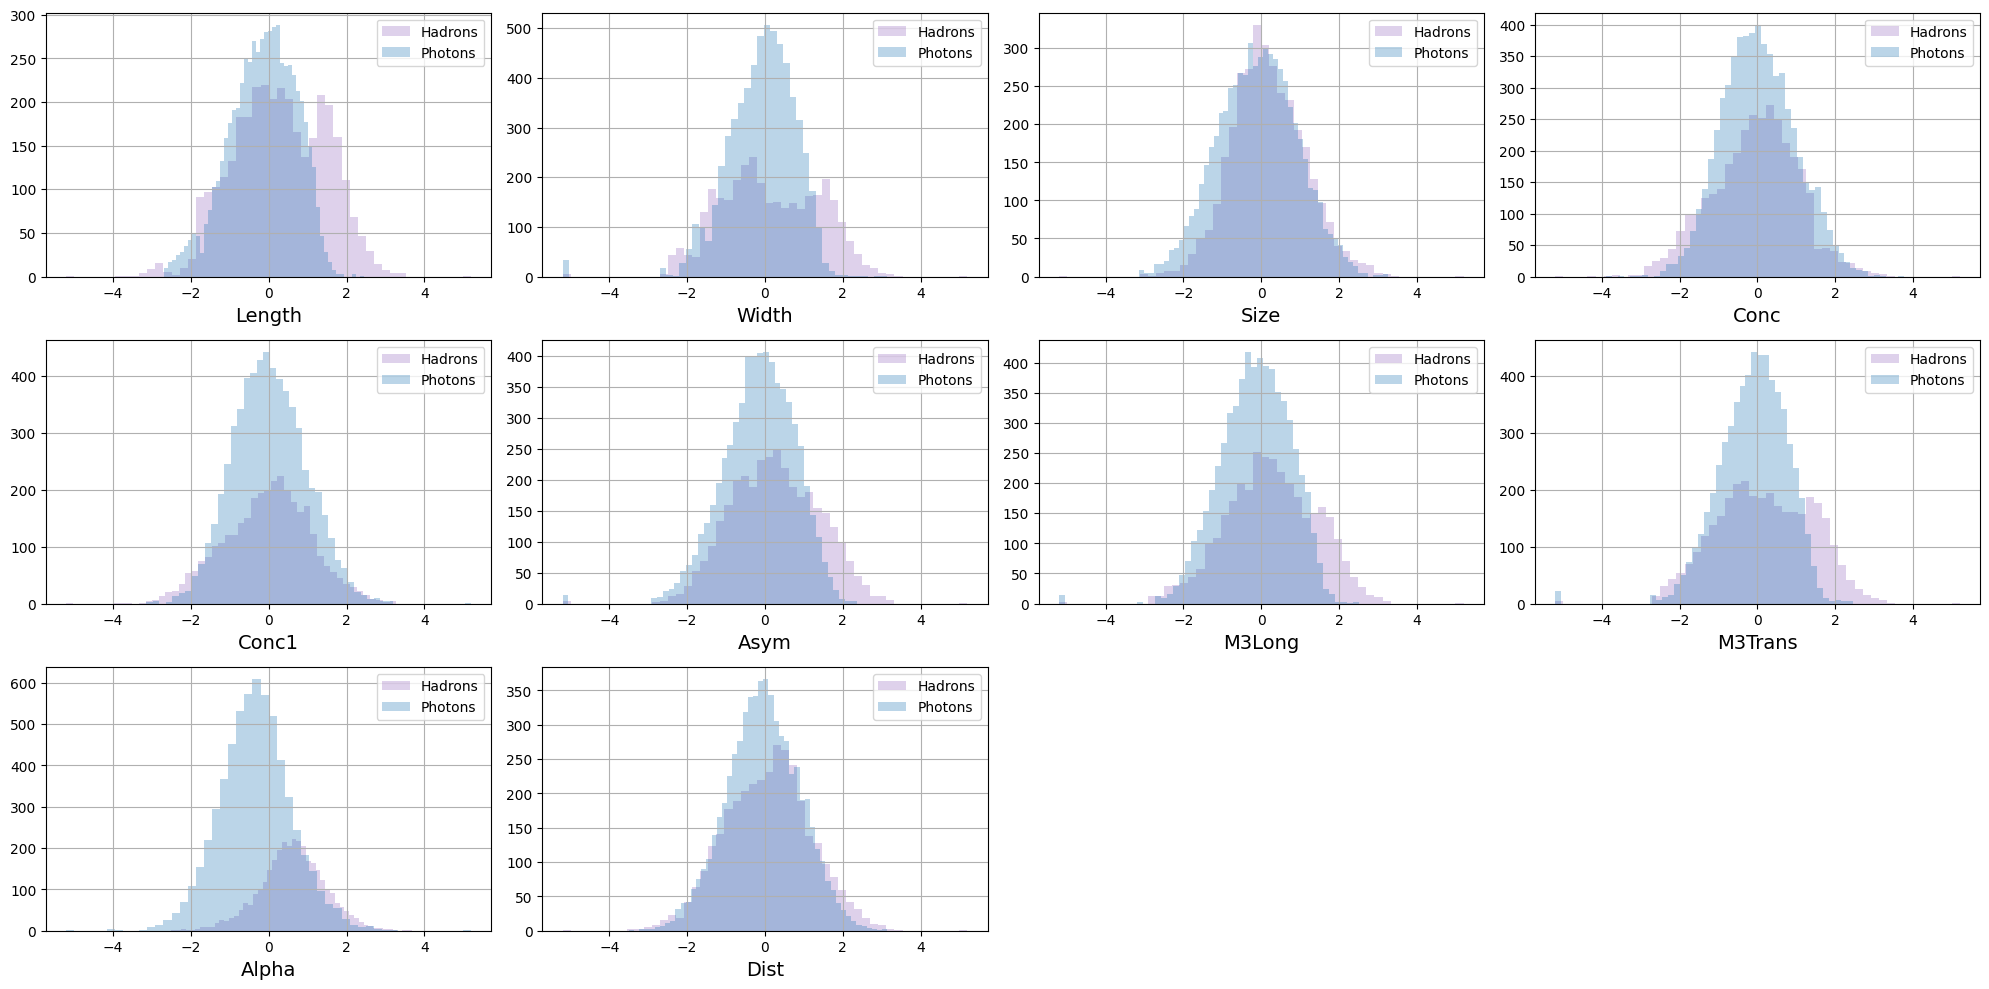

In [9]:
plot_hists(X_train[y_train[:, 0] == 0], X_train[y_train[:, 0] == 1], names, label1 = "Hadrons", label2 = "Photons", bins = 50)

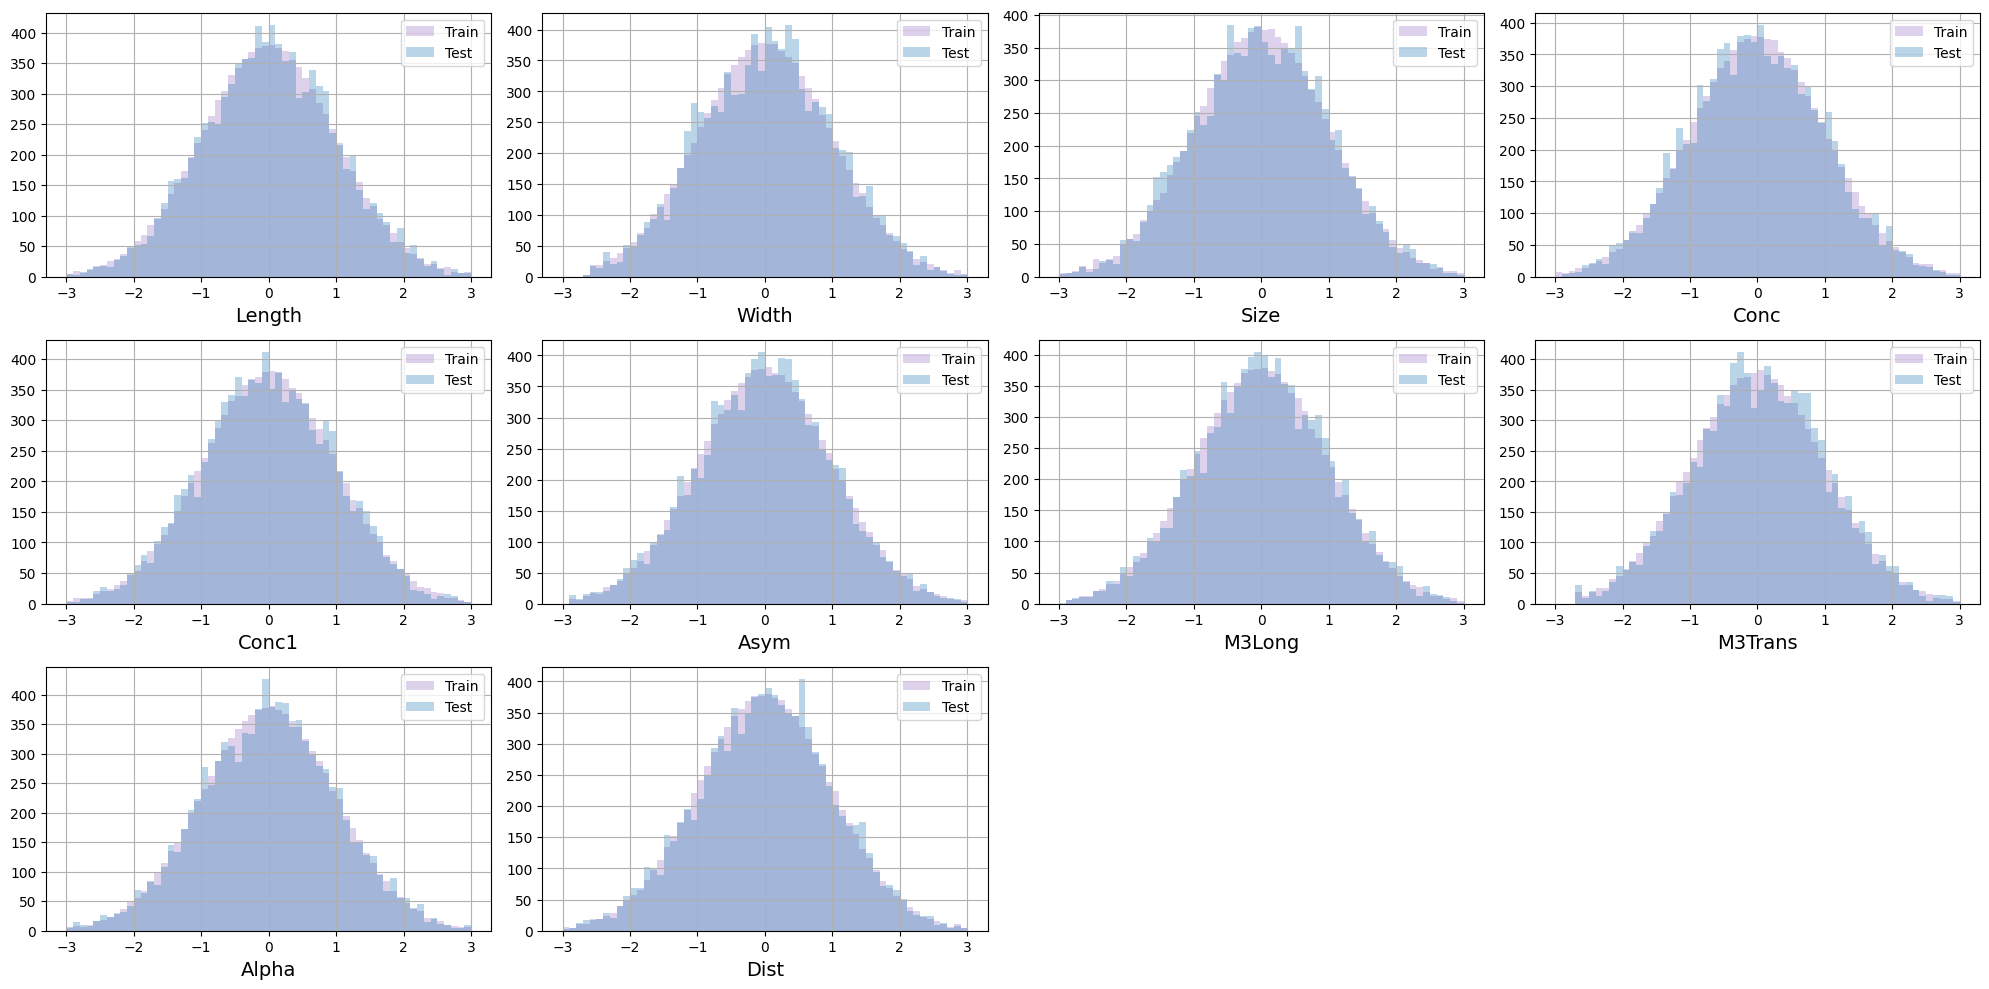

In [10]:
plot_hists(X_train, X_test, names, label1 = "Train", label2 = "Test")

## Conditional WGAN

Мы будем использовать `Conditional WGAN`, который изображен на рисунке. В качестве условия `y` мы будем использовать метку класса: **0** - адрон, **1** - фотон. Таким образом, мы будем сообщать генератору для какой частицы нужно генерировать параметры изображения. 

<center><img src="img/cgan.png" width="800"></center>

Генератор $\hat{x} = G(z, y)$ будет принимать на вход шумовой вектор $z$ и вектор условий $y$, а выдавать будет сгенерированный (фейковый) вектор параметров $\hat{x}$. 

Дискриминатор $D(x, y)$ будет принимать на вход вектор параметров $x$ и вектор условий $y$, а возвращать будет рациональное число.

Обучать `Conditional WGAN` будем с такой функцией потерь:

$$L(G, D) = -\frac{1}{n} \sum_{x_i \in X, y_i \in y} D(x_i, y_i) + -\frac{1}{n} \sum_{z_i \in Z, y_i \in y} D(G(z_i, y_i), y_i) \to \max_G \min_D$$

In [11]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(DEVICE)

RANDOM_STATE = 42
def set_random_seed(seed: int) -> None:
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
def fix_random() -> None:
    return set_random_seed(RANDOM_STATE)
fix_random()

cuda


### Задание 3 (0.75 балла)

Реализуйте нейронную сеть для генератора со следующими слоями:
- Полносвязный слой со 100 нейронами;
- Слой батч-нормализации;
- ReLU функцию активации;
- Полносвязный слой со 100 нейронами;
- Слой батч-нормализации;
- ReLU функцию активации;
- Выходной слой.

In [12]:
class Generator(nn.Module):
    def __init__(self, n_inputs, n_outputs):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(n_inputs, 100), nn.BatchNorm1d(100), nn.ReLU(),
            nn.Linear(100, 100), nn.BatchNorm1d(100), nn.ReLU(),
            nn.Linear(100, n_outputs)
        )

    def forward(self, z, y):
        zy = torch.cat((z, y), dim = 1)
        return self.model(zy)

### Задание 4 (0.5 балл)

Реализуйте функцию для генерации новый объектов $X$ по вектору условий $y$.

In [13]:
def generate(generator, y, latent_dim):
    generator.eval().to(DEVICE)
    z = torch.normal(0, 1, (len(y), latent_dim), device = DEVICE)
    y = torch.tensor(y, dtype = torch.float32, device = DEVICE)
    with torch.no_grad():
        return generator(z, y).cpu().detach().numpy()

### Задание 5 (0.75 балла)

Реализуйте нейронную сеть для дискриминатора со следующими слоями:
- Полносвязный слой со 100 нейронами;
- ReLU функцию активации;
- Полносвязный слой со 100 нейронами;
- ReLU функцию активации;
- Выходной слой.

Какая функция активации должна быть в конце работы модели и почему? А она вообще тут должна быть? Обоснуйте свой выбор.

В конце работы модели должна быть сигмоида, так как дискриминатор решает задачу бинарной классификации (является объект настоящим или сгенерированным), для чего необходимо привести выходы модели в интервал [0; 1]. В таком случае возвращаемые значения дискриминатора будут соответствовать вероятностям принадлежности объектов к положительному классу, указывающему на то, что объект является сгенерированным. \
Может быть целесообразным использование LogSigmoid для удобства вычисления бинарной кросс-энтропии. Тем не менее в задании требуется другая функция потерь, поэтому взятие логарифма происходить не должно. \
Более того, функцию активации можно не использовать вовсе. Тем не менее это может привести к большим абсолютным значениям логитов и весов модели, что способствует переобучению.

In [14]:
class Discriminator(nn.Module):
    def __init__(self, n_inputs):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(n_inputs, 100), nn.ReLU(),
            nn.Linear(100, 100), nn.ReLU(),
            nn.Linear(100, 1), nn.Sigmoid()
        )

    def forward(self, x, y):
        xy = torch.cat((x, y), dim = 1)
        return self.model(xy)

### Задание 6 (0.5 балла)

Реализуйте функцию, которая принимала бы на вход набор сгенерированных и настоящих объектов, разбивала на train и test с учетом баланса классов (real и fake объектов), с соотношением 3 к 1, обучала модель логистической регрессии и градиентного бустинга, которые учились бы отличать настоящие объекты от фальшивых, после чего выводила бы accuracy score на отложенной выборке у обоих моделей.

Ответьте на вопрос: какое значение accuracy score нас бы удовлетворило больше всего? Почему?

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

def other_agent_score(X_real, y_real, X_fake, y_fake, print_scores = True):
    real = np.concatenate([ X_real, y_real ], axis = 1)
    fake = np.concatenate([ X_fake, y_fake ], axis = 1)
    X = np.concatenate([ real, fake ], axis = 0)
    y = (np.arange(len(X)) >= len(real)).astype(np.int32)
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.25, shuffle = True, random_state = RANDOM_STATE)

    logreg = LogisticRegression(n_jobs = -1).fit(X_train, y_train)
    y_logreg = logreg.predict(X_test)
    log_reg_score = accuracy_score(y_test, y_logreg)

    boost = GradientBoostingClassifier().fit(X_train, y_train)
    y_boost = boost.predict(X_test)
    boosting_score = accuracy_score(y_test, y_boost)

    if print_scores:
        print("Logistic regression score: " + str(log_reg_score))
        print("Boosting score: " + str(boosting_score))
    return log_reg_score, boosting_score

Задача генеративной модели - создать объекты, не отличимые от настоящих. Таким образом, нас бы наиболее удовлетворило нулевое значение accuracy score, так как именно оно указывает на то, что логистическая регрессия и градиентный бустинг неверно определяют, является ли объект настоящим. \
Тем не менее нулевое значение accuracy score означает, что модель идеально отделяет сгенерированные объекты от настоящих, но путает классы, принимая настоящие за сгенерированные и наоборот. На практике такой результат, скорее всего, ничем не лучше accuracy score, равного единице, при котором модель верно классифицирует, является ли объект настоящим. \
На практике генеративная модель должна создавать объекты, вовсе неотличимые от настоящих: должно быть невозможно не только определить, что объект является сгенерированным, но и в целом найти какие-либо отличия между настоящими и сгенерированными объектами (даже если по этим отличиям нельзя однозначно сказать, какой из объектов настоящий). То есть, для хорошей генеративной модели логистическая регрессия и градиентный бустинг вовсе не должны выявлять какие-либо закономерности; предсказания должны быть полностью случайны. Этому описания соответствует значение accuracy score, равное `0,5`.

### Задание 7 (1.5 балла)

Реализуйте класс для обучения генеративной модели.

- Уточнение 1: Нужно ограничивать веса дискриминатора. Для этого используйте `p.data.clamp_(-0.01, 0.01)`, где `p` веса дискриминатора. Зачем это делать можно посмотреть в оригинальной статье <https://arxiv.org/pdf/1701.07875.pdf>.
- Подсказка 1: `n_critic` - число итераций обучения дискриминатора на одну итерацию обучения генератора.
- Подсказка 2: Используйте `X_tensor = torch.tensor(X_numpy, dtype=torch.float, device=DEVICE)` для перевода numpy в тензор.

In [16]:
import tqdm

class Fitter(object):
    def __init__(
        self,
        generator: Generator,
        discriminator: Discriminator,
        batch_size: int = 32,
        n_epochs: int = 10,
        latent_dim: int = 1,
        lr: float = 0.0001,
        n_critic: int = 5,
    ):
        self.generator = generator
        self.discriminator = discriminator
        self.batch_size = batch_size
        self.n_epochs = n_epochs
        self.latent_dim = latent_dim
        self.lr = lr
        self.n_critic = n_critic

        self.opt_gen = torch.optim.RMSprop(self.generator.parameters(), lr = self.lr, maximize = True)
        self.opt_disc = torch.optim.RMSprop(self.discriminator.parameters(), lr = self.lr, maximize = False)

    def loss(self, X_real, X_fake, y):
        discr_real = self.discriminator(X_real, y)
        discr_fake = self.discriminator(X_fake, y)
        return torch.mean(discr_real) - torch.mean(discr_fake)


    def fit(self, X, y):
        self.generator.to(DEVICE)
        self.discriminator.to(DEVICE)
        
        # numpy to tensor
        X = torch.tensor(X, dtype = torch.float, device = DEVICE)
        y = torch.tensor(y, dtype = torch.float, device = DEVICE)

        # tensor to dataset
        dataset_real = TensorDataset(X, y)

        # Fit GAN
        iter_i = 0
        self.loss_history = []
        self.log_reg_score_history = []
        self.boosting_score_history = []
        for _ in tqdm.trange(self.n_epochs):
            for X_real, y_real in DataLoader(dataset_real, batch_size = self.batch_size, shuffle = True):
                if iter_i % (self.n_critic + 1) == 0:
                    opt = self.opt_gen
                    self.generator.train()
                    self.discriminator.eval()
                else:
                    opt = self.opt_disc
                    self.generator.eval()
                    self.discriminator.train()
            
                opt.zero_grad()

                Z = torch.normal(0, 1, (len(X_real), self.latent_dim), device = DEVICE)
                X_fake = self.generator(Z, y_real)

                loss = self.loss(X_real, X_fake, y_real)
                loss.backward() # Calculate gradients
                opt.step() # Update weights
                iter_i += 1
                 
                for param in self.discriminator.parameters():
                    param.data.clamp_(-0.01, 0.01)

            # caiculate and store loss after an epoch
            self.generator.eval()
            self.discriminator.eval()
            with torch.no_grad():
                Z = torch.normal(0, 1, (len(X), self.latent_dim), device = DEVICE)
                X_fake = self.generator(Z, y)
                loss = self.loss(X, X_fake, y)
                self.loss_history.append(loss.detach().cpu().item())

            # Создайте выборку из 1000 объектов из X_train и 1000 сгенерированных объектов
            # И запустите работу фукнции other_agent_score
            idx = np.random.randint(X.shape[0], size = 1000)
            X_real, y_real = X[idx].cpu().numpy(), y[idx].cpu().numpy()
            X_fake = generate(self.generator, y_real, self.latent_dim)
            log_reg_score, boosting_score = other_agent_score(X_real, y_real, X_fake, y_real, False)
            self.log_reg_score_history.append(log_reg_score)
            self.boosting_score_history.append(boosting_score)

        self.generator.cpu().eval()
        self.discriminator.cpu().eval()

#### Обучение

Обучим модель на данных.

In [17]:
fix_random()
latent_dim = 10
generator = Generator(n_inputs = latent_dim + y.shape[1], n_outputs = X_train.shape[1])
discriminator = Discriminator(n_inputs = X_train.shape[1] + y.shape[1])

fitter = Fitter(
    generator,
    discriminator,
    batch_size = 50,
    n_epochs = 100,
    latent_dim = latent_dim,
    lr = 0.0001,
    n_critic = 5,
)
fitter.fit(X_train, y_train)

100%|██████████| 100/100 [02:45<00:00,  1.65s/it]


In [18]:
def draw_epoch_line(line, ylabel, title):
    plt.figure(figsize = (10, 2))
    plt.plot(line)
    plt.xlabel("Epoch Number", size = 14)
    plt.ylabel(ylabel, size = 14)
    plt.xticks(size = 14)
    plt.yticks(size = 14)
    plt.title(title, size = 14)
    plt.grid(visible = True, linestyle = "--", linewidth = 0.5, color = "0.5")
    plt.show()

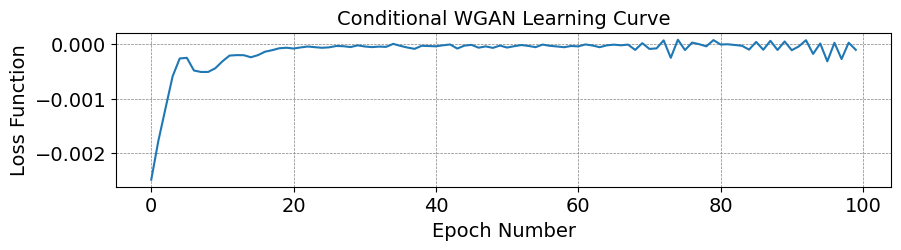

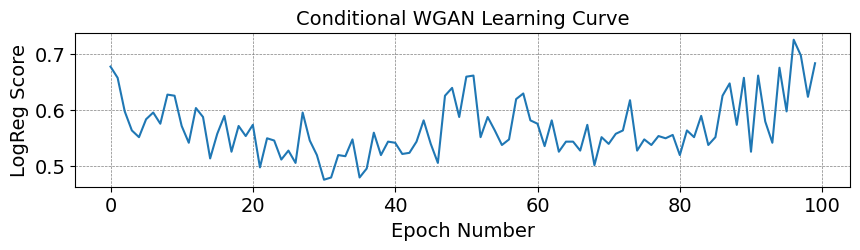

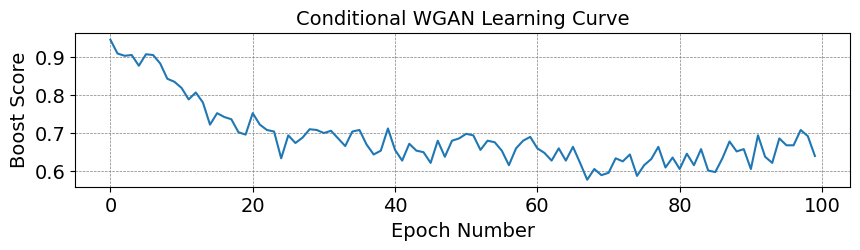

In [19]:
draw_epoch_line(fitter.loss_history, "Loss Function", "Conditional WGAN Learning Curve")
draw_epoch_line(fitter.log_reg_score_history, "LogReg Score", "Conditional WGAN Learning Curve")
draw_epoch_line(fitter.boosting_score_history, "Boost Score", "Conditional WGAN Learning Curve")

### Задание 8 (0.5 балла)

Теперь сгенерируем фейковые матрицы `X_fake_train` и `X_fake_test`. Сравним их с матрицами реальных объектов `X_train` и `X_test`. Перед сравнением результатов сделайте обратное квантильное преобразование с помощью трансформера, который вы обучили в задании 2.

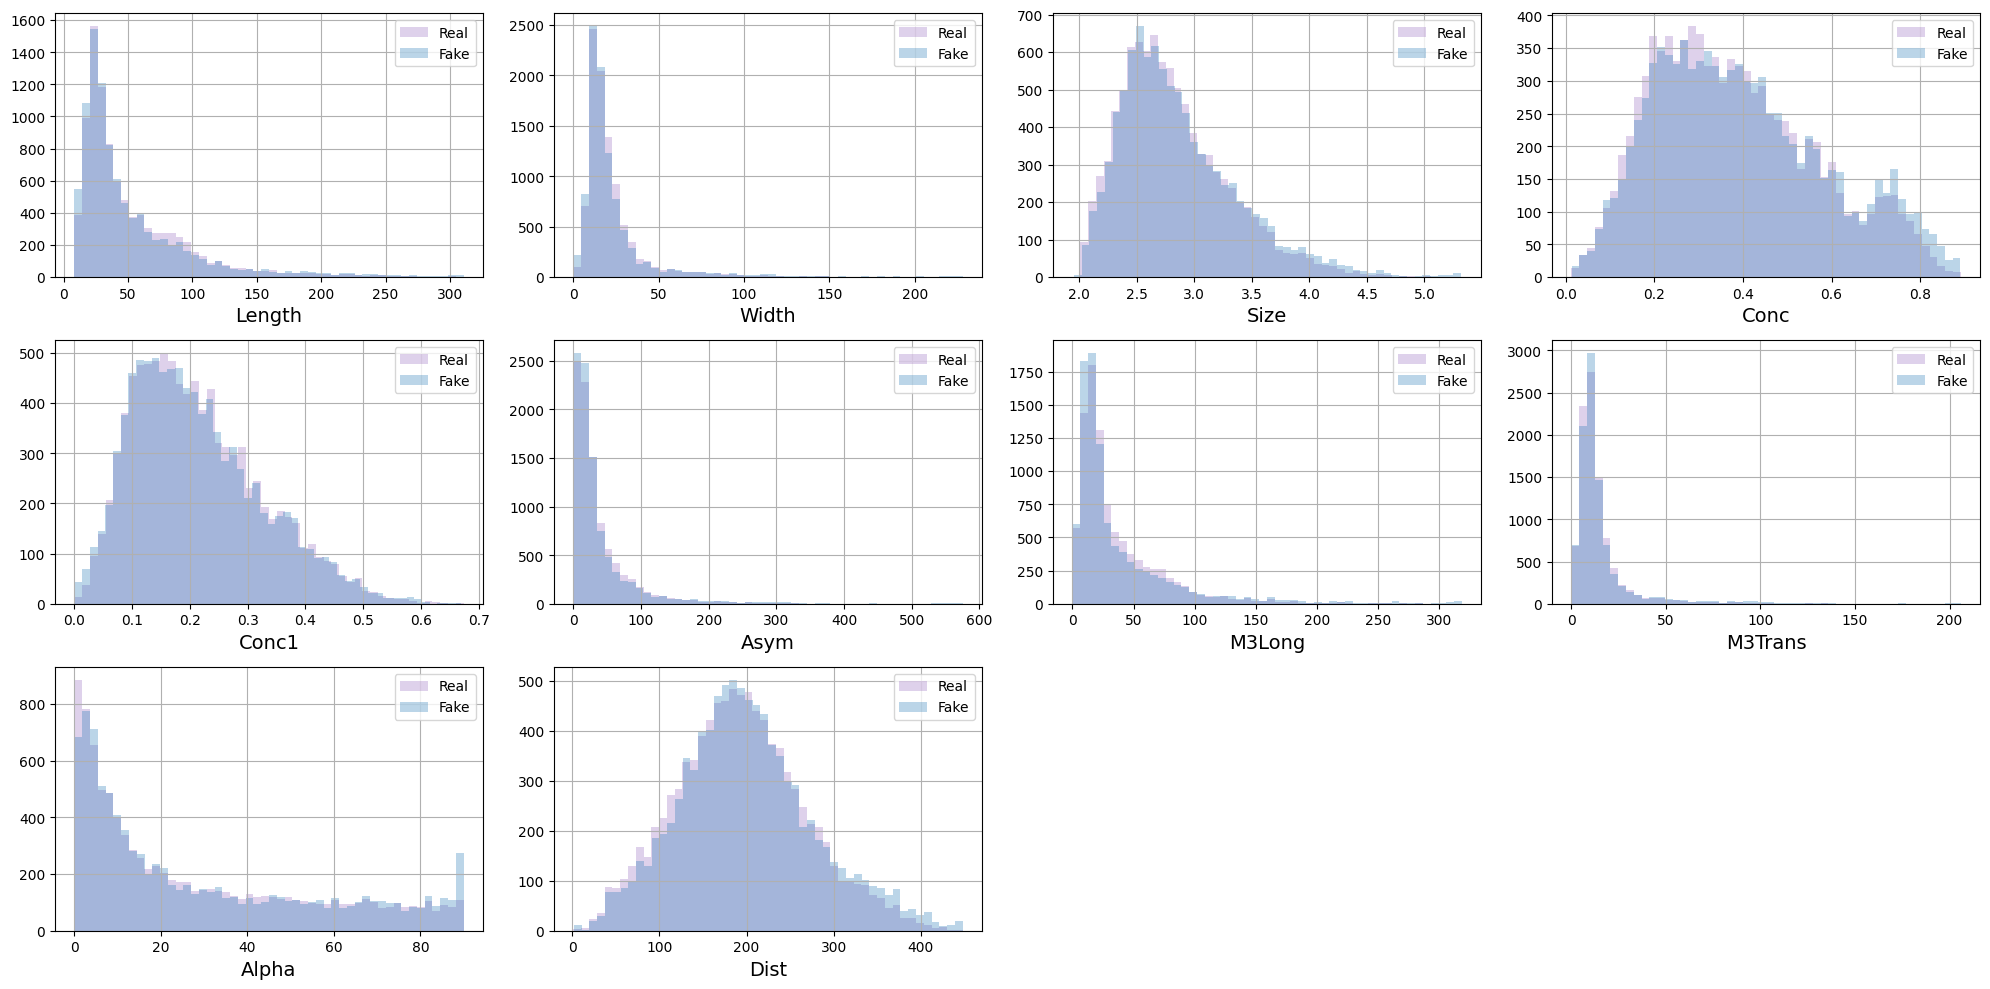

In [20]:
X_fake_train = generate(fitter.generator, y_train, latent_dim)
plot_hists(
    transformer.inverse_transform(X_train),
    transformer.inverse_transform(X_fake_train),
    names,
    label1 = "Real",
    label2 = "Fake",
    bins = 50
)

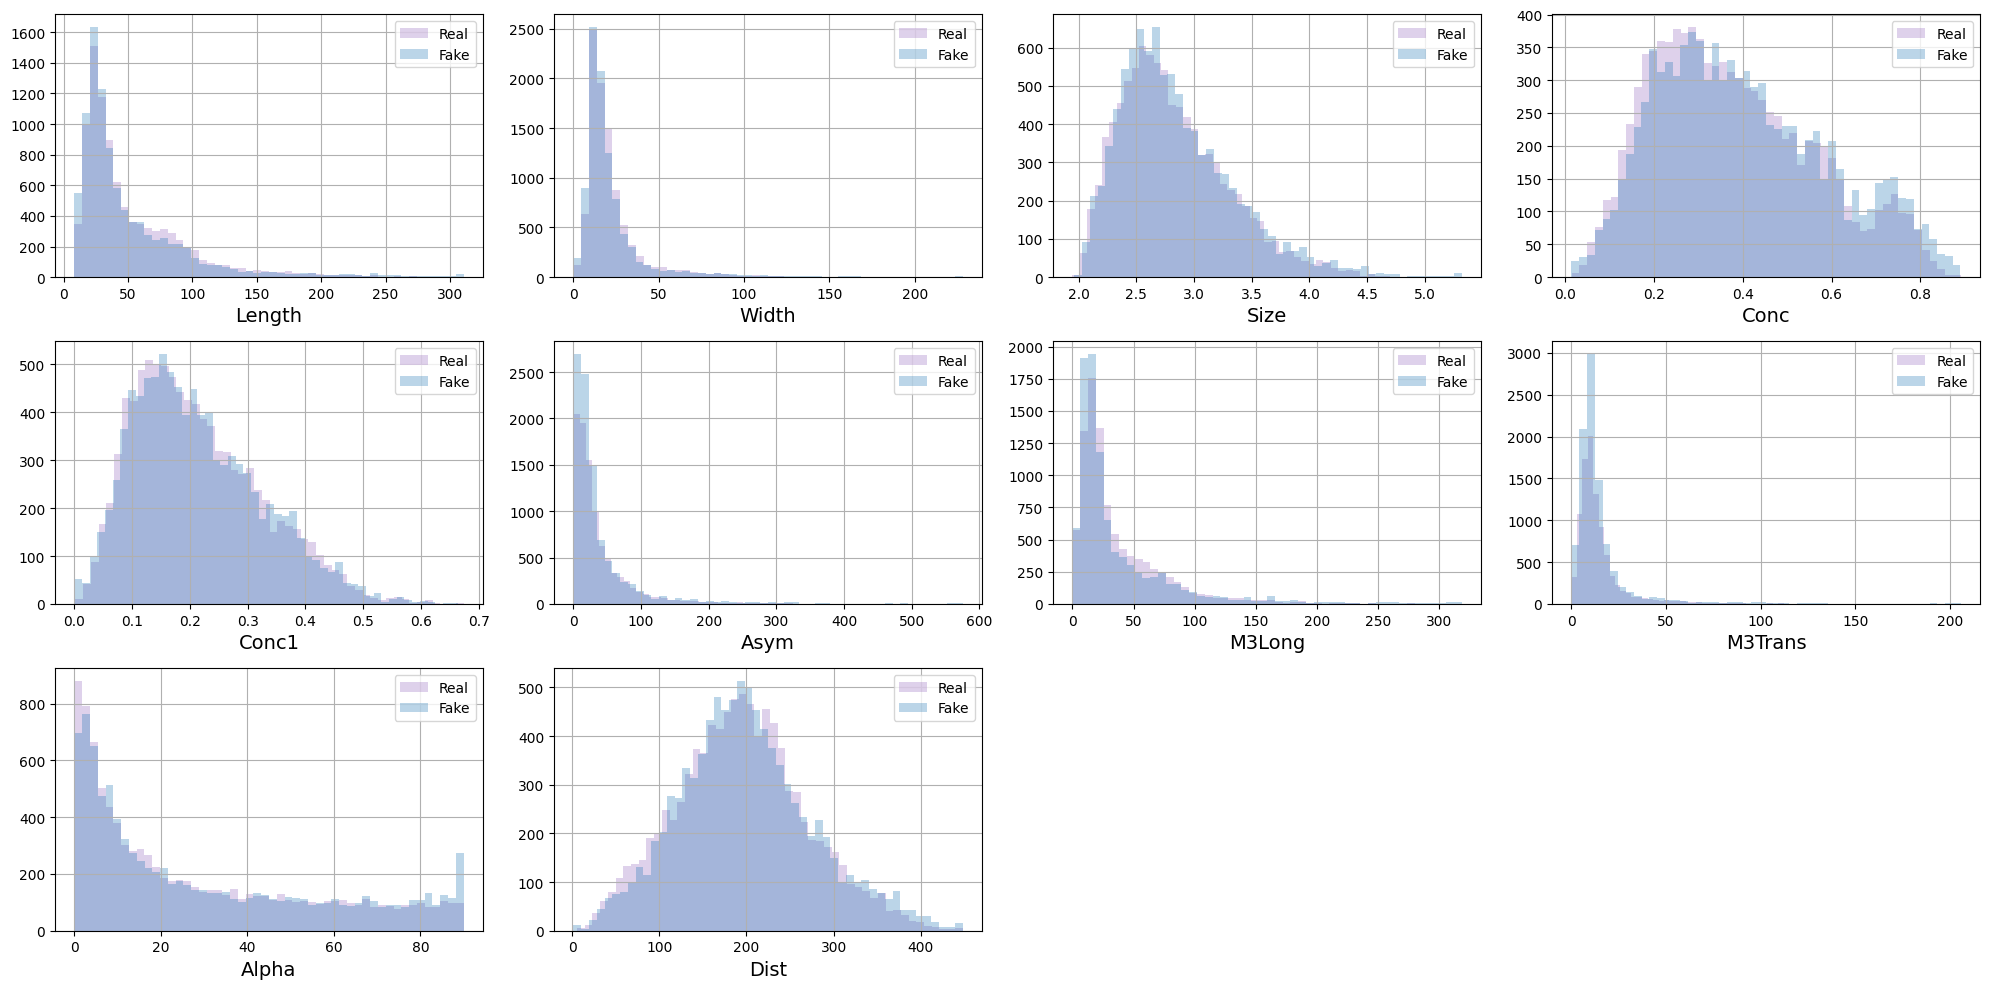

In [21]:
X_fake_test = generate(fitter.generator, y_test, latent_dim)
plot_hists(
    transformer.inverse_transform(X_test),
    transformer.inverse_transform(X_fake_test),
    names,
    label1 = "Real",
    label2 = "Fake",
    bins = 50
)

### Вывод: 

Визуально мы видим сходство реальных и фейковых данных. Однако это только проекции 10-мерных объектов на одну ось.

## Измерение качества генерации

<center><img src="img/clf.png" width="600"></center>

Измерим сходство распределений классификатором.

In [22]:
# собираем реальный и фейковые матрицы в одну
XX_train = np.concatenate((X_fake_train, X_train), axis = 0)
XX_test = np.concatenate((X_fake_test, X_test), axis = 0)

yy_train = np.array([0] * len(X_fake_train) + [1] * len(X_train))
yy_test = np.array([0] * len(X_fake_test) + [1] * len(X_test))

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

# обучаем классификатор
clf = GradientBoostingClassifier()
clf.fit(XX_train, yy_train)

# получаем прогнозы
yy_test_proba = clf.predict_proba(XX_test)[:, 1]

In [24]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(yy_test, yy_test_proba)
print("ROC AUC =", auc)

ROC AUC = 0.8138345601121626


### Задание 9 (0.5 балла)

Опишите ваш эксперимент. Как вы оцениваете полученные результаты? Как вы думаете, какое значение ROC AUC нас удовлетворяет больше всего? Почему?

Таким образом, я реализовал и обучил простейшую генеративную модель с архитектурой GAN. Как видно из графиков, во время обучения модель достаточно хорошо научилась воспроизводить признаки: распределения отдельных координат сгенерированных и настоящих векторов практически совпадают. Тем не менее в совокупности распределения не так хороши: модели логистической регрессии и градиентного бустинга способны успешно определять, является ли объект настоящим, в 60% - 70% случаев для случайной выборки из 1000 объектов, что, на самом деле, является достаточно неплохим результатом для столь простой реализации архитектуры. \
Заметим, что градиентный бустинг как правило показывает качество лучше, чем логистическая регрессия, что ожидаемо: градиентный бустинг способен выявлять более сложные, нелинейные закономерности, а также более устойчив к переобучению. \
В заключение был вычислен ROC-AUC для предсказаний градиентного бустинга на полной тестовой выборке из около 9500 настоящих и 9500 сгенерированных объектов. Значение метрики немного превысило 0.8, что говорит о достаточно хорошей разделимости настоящих и сгенерированных объектов и не очень высоком качестве генерации. Тем не менее результат достаточно хорош для столь простой модели. \
Аналогично accuracy score, наилучшим значением ROC-AUC в данной задаче является ноль, означающий, что модель путает настоящие и сгенерированные объекты. Тем не менее это может быть не совсем то, что ожидается от генерации. На практике хорошими обычно считают результаты, вовсе не отличимые от настоящих (в таком случае градиентный бустинг фактически возвращает случайные прогнозы). Этому случаю соответствует значение ROC-AUC, равное `0,5`.

## Диффузионные модели.

Давайте теперь проведем такой же экперимент с простой диффузионной моделью.

### Задание 10 (0.5 балла)

Реализуйте фукнцию из семинара для зашумления данных, адаптировав ее под наш тип данных.

In [25]:
def corrupt(x, amount):
    noise = torch.randn_like(x)
    return x * (1 - amount) + noise * amount

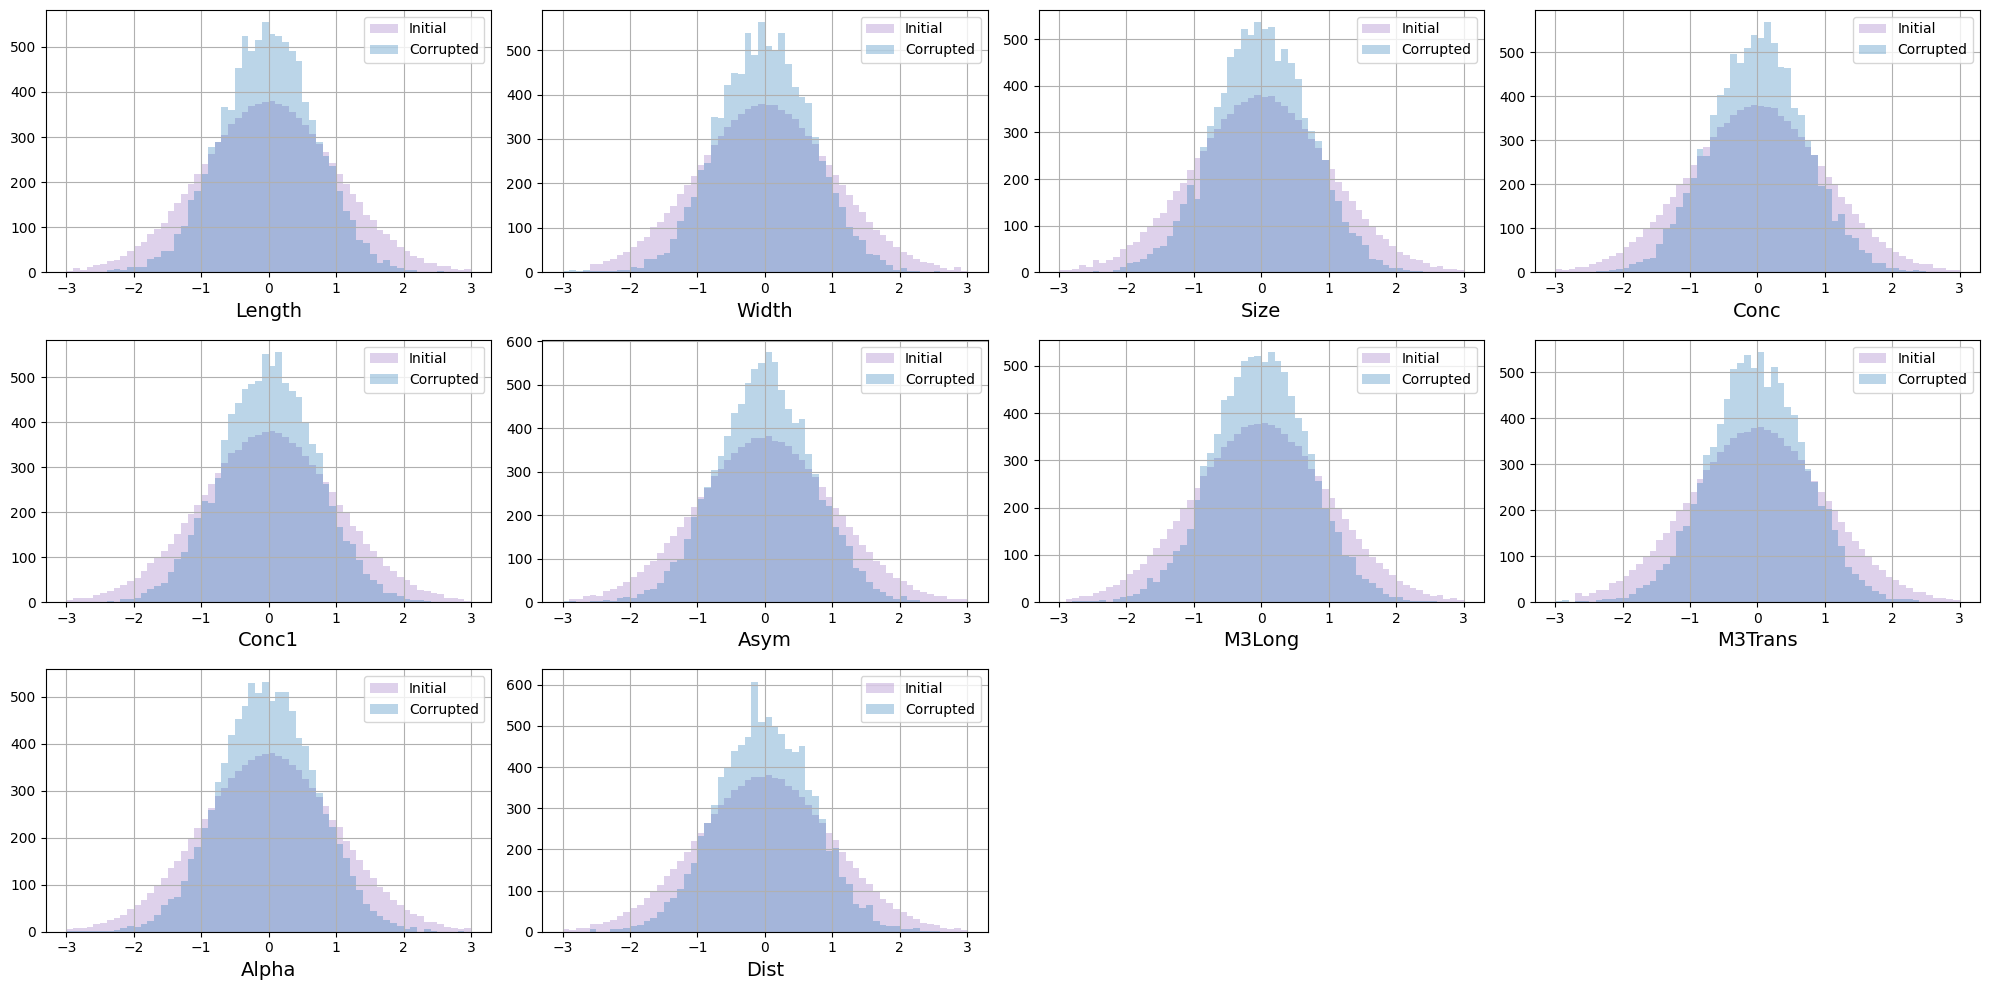

In [26]:
fix_random()
plot_hists(X_train, corrupt(torch.tensor(X_train), 0.5), names, label1 = "Initial", label2 = "Corrupted")

Добавим sсheduler, он пригодится вам при обучении модели

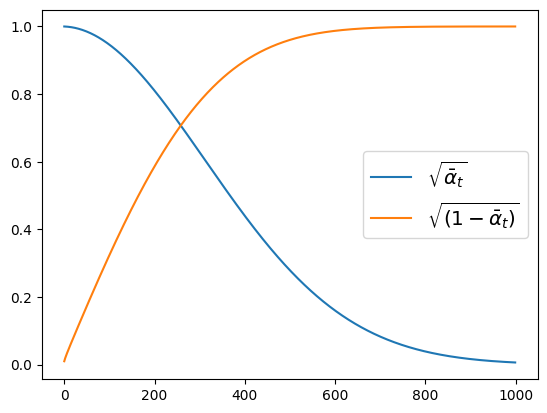

In [27]:
from diffusers import DDPMScheduler
noise_scheduler = DDPMScheduler(num_train_timesteps = 1000, clip_sample = False)
plt.plot(
    noise_scheduler.alphas_cumprod.cpu() ** 0.5,
    label = r"${\sqrt{\bar{\alpha}_t}}$"
)
plt.plot(
    (1 - noise_scheduler.alphas_cumprod.cpu()) ** 0.5,
    label = r"$\sqrt{(1 - \bar{\alpha}_t)}$",
)
plt.legend(fontsize = "x-large")

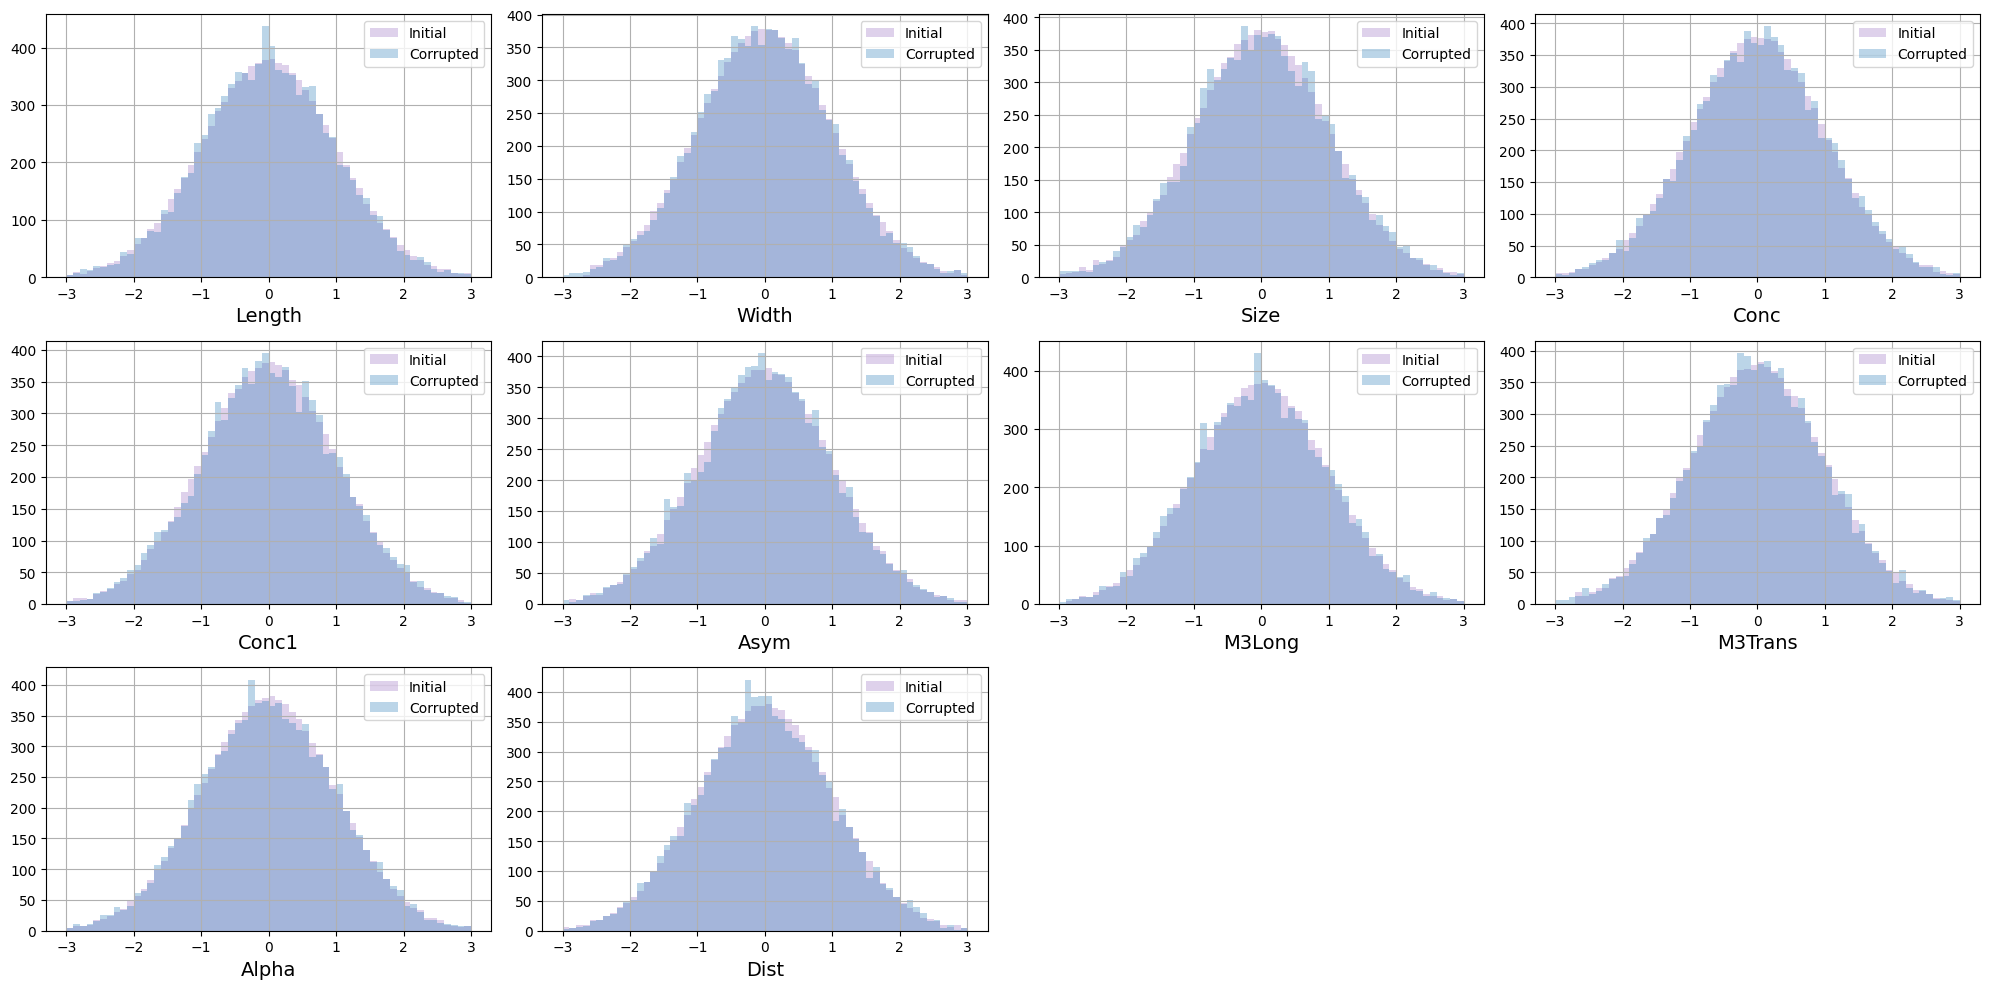

In [28]:
fix_random()
x = torch.tensor(X_train)
noise = torch.randn_like(x)
timesteps = torch.randint(0, 999, (x.shape[0],)).long()
noisy_x = noise_scheduler.add_noise(x, noise, timesteps)
plot_hists(X_train, noisy_x, names, label1 = "Initial", label2 = "Corrupted")

### Задание 11 (0.5 балла)

Реализуйте нейронную сеть. В качетсве архитектуры можете взять модель генератора. В процессе экспериментов попробуйте изменять архитектуру модели для улучшения качества сгенерированных объектов (Кстати, как вы будете качество измерять?). 

- Полносвязный слой со 100 нейронами;
- Слой батч-нормализации;
- ReLU функцию активации;
- Полносвязный слой со 100 нейронами;
- Слой батч-нормализации;
- ReLU функцию активации;
- Выходной слой.

In [29]:
class DiffusionGenerator(nn.Module):
    def __init__(self, n_inputs, n_outputs):
        super(DiffusionGenerator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(n_inputs, 100), nn.BatchNorm1d(100), nn.ReLU(),
            nn.Linear(100, 100), nn.BatchNorm1d(100), nn.ReLU(),
            nn.Linear(100, n_outputs)
        )

    def forward(self, z, y, t):
        zyt = torch.cat((z, y, t), dim = 1)
        return self.model(zyt)

### Задание 12 (0.5 балла)

Напишите функцию для генерации нового объекта с помощью обученной модели.

In [30]:
def generate_with_diffusion(model, y, latent_dim, sheduler: DDPMScheduler):
    model.eval().to(DEVICE)
    x = torch.randn(y.shape[0], latent_dim).to(DEVICE)
    y = torch.tensor(y, dtype = torch.float32, device = DEVICE)
    for t in sheduler.timesteps:
        with torch.no_grad():
            pred_noise = model(x, y, torch.full_like(y, t))
        x = sheduler.step(pred_noise, t, x).prev_sample
    return x.cpu().detach().numpy()

### Задание 13 (2 балла)

Напишите класс обучения диффузионной модели и обучите модель, после чего опишите полученные результаты. В качестве подсказки - опирайтесь на семинар по диффузионным моделям. Вы можете изменять некоторые части кода для вашего удобства, но оставляйте в таком случаи комментарии, пожалуйста.

In [31]:
import tqdm

class DiffusionFitter(object):
    def __init__(
        self,
        model,
        batch_size=32,
        n_epochs=10,
        latent_dim=1,
        lr=0.0001,
    ):

        self.model = model
        self.batch_size = batch_size
        self.n_epochs = n_epochs
        self.latent_dim = latent_dim
        self.lr = lr

        self.opt_gen = torch.optim.RMSprop(self.model.parameters(), lr = self.lr)

    def fit(self, X, y):
        self.model.to(DEVICE)
        
        # numpy to tensor
        X = torch.tensor(X, dtype = torch.float, device = DEVICE)
        y = torch.tensor(y, dtype = torch.float, device = DEVICE)

        # tensor to dataset
        dataset_real = TensorDataset(X, y)

        # Fit GAN
        self.loss_history = []
        self.log_reg_score_history = []
        self.boosting_score_history = []
        for _ in tqdm.trange(self.n_epochs):
            for X_real, y_real in DataLoader(dataset_real, batch_size = self.batch_size, shuffle = True):
                self.model.train()
                self.opt_gen.zero_grad()

                noise = torch.randn_like(X_real).to(DEVICE)
                timesteps = torch.randint(0, 999, (X_real.shape[0],)).long().to(DEVICE)
                noisy_x = noise_scheduler.add_noise(X_real, noise, timesteps)

                pred_noise = self.model(noisy_x, y_real, timesteps.reshape(-1, 1))
                loss = torch.nn.functional.mse_loss(pred_noise, noise)
                loss.backward()
                self.opt_gen.step()

            # caiculate and store loss after an epoch
            self.model.eval()
            with torch.no_grad():
                noise = torch.randn_like(X).to(DEVICE)
                timesteps = torch.randint(0, 999, (X.shape[0],)).long().to(DEVICE)
                noisy_x = noise_scheduler.add_noise(X, noise, timesteps)

                pred_noise = self.model(noisy_x, y, timesteps.reshape(-1, 1))
                loss = torch.nn.functional.mse_loss(pred_noise, noise)
                self.loss_history.append(loss.detach().cpu().item())

            # Создайте выборку из 1000 объектов из X_train и 1000 сгенерированных объектов
            # И запустите работу фукнции other_agent_score
            idx = np.random.randint(X.shape[0], size = 1000)
            X_real, y_real = X[idx].cpu().numpy(), y[idx].cpu().numpy()
            X_fake = generate_with_diffusion(self.model, y_real, self.latent_dim, noise_scheduler)
            log_reg_score, boosting_score = other_agent_score(X_real, y_real, X_fake, y_real, False)
            self.log_reg_score_history.append(log_reg_score)
            self.boosting_score_history.append(boosting_score)

        # Turn off training
        self.model.cpu().eval()

In [40]:
fix_random()
latent_dim = 10
model = DiffusionGenerator(n_inputs = latent_dim + y.shape[1] + 1, n_outputs = X_train.shape[1])

diffusionFitter = DiffusionFitter(
    model,
    batch_size=50,
    n_epochs=100,
    latent_dim=latent_dim,
    lr=0.0001,
)
diffusionFitter.fit(X_train, y_train)

100%|██████████| 100/100 [03:35<00:00,  2.16s/it]


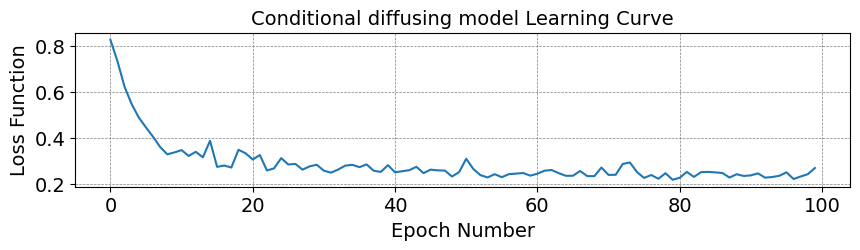

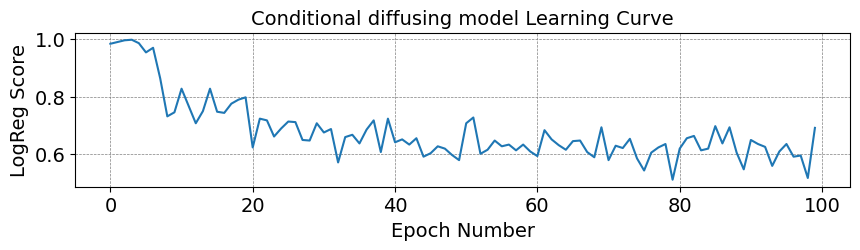

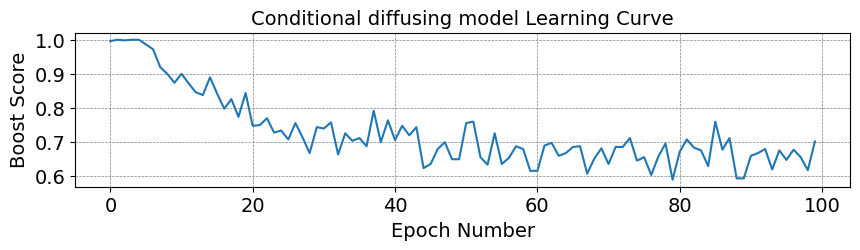

In [41]:
draw_epoch_line(diffusionFitter.loss_history, "Loss Function", "Conditional diffusing model Learning Curve")
draw_epoch_line(diffusionFitter.log_reg_score_history, "LogReg Score", "Conditional diffusing model Learning Curve")
draw_epoch_line(diffusionFitter.boosting_score_history, "Boost Score", "Conditional diffusing model Learning Curve")

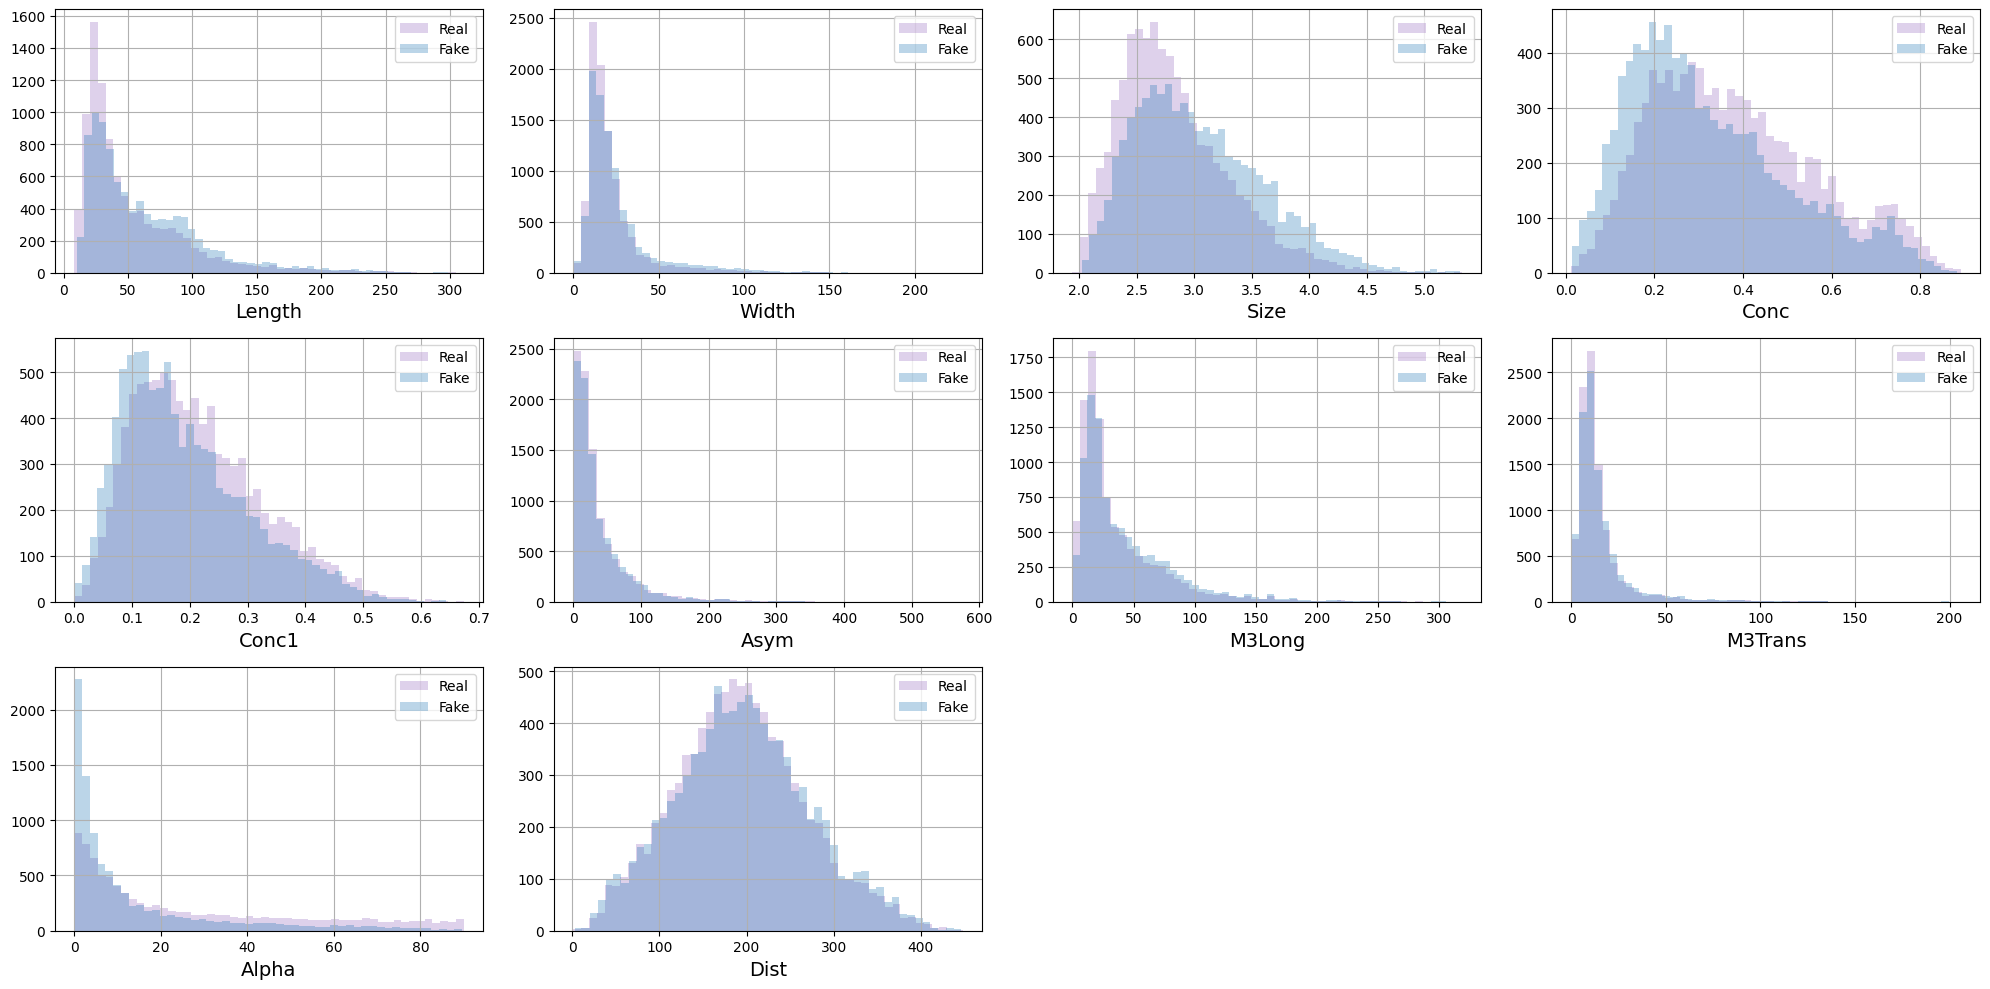

In [42]:
X_fake_train = generate_with_diffusion(diffusionFitter.model, y_train, latent_dim, noise_scheduler)
plot_hists(
    transformer.inverse_transform(X_train),
    transformer.inverse_transform(X_fake_train),
    names,
    label1 = "Real",
    label2 = "Fake",
    bins = 50
)

### Задание 14 (0.5 балла)

По аналогии с прошлым экспериментом с GAN моделью сгенерируйте выборку фейковых объектов равную размеру тестовой выборки и обучите градиентный бустинг. Обучите модель отличать реальные объекты от фейковых, после чего расчитайте метрики ROC-AUC и accuracy score. Какие получились результаты? Как вы их оцениваете? А в сравнении с GAN моделью?

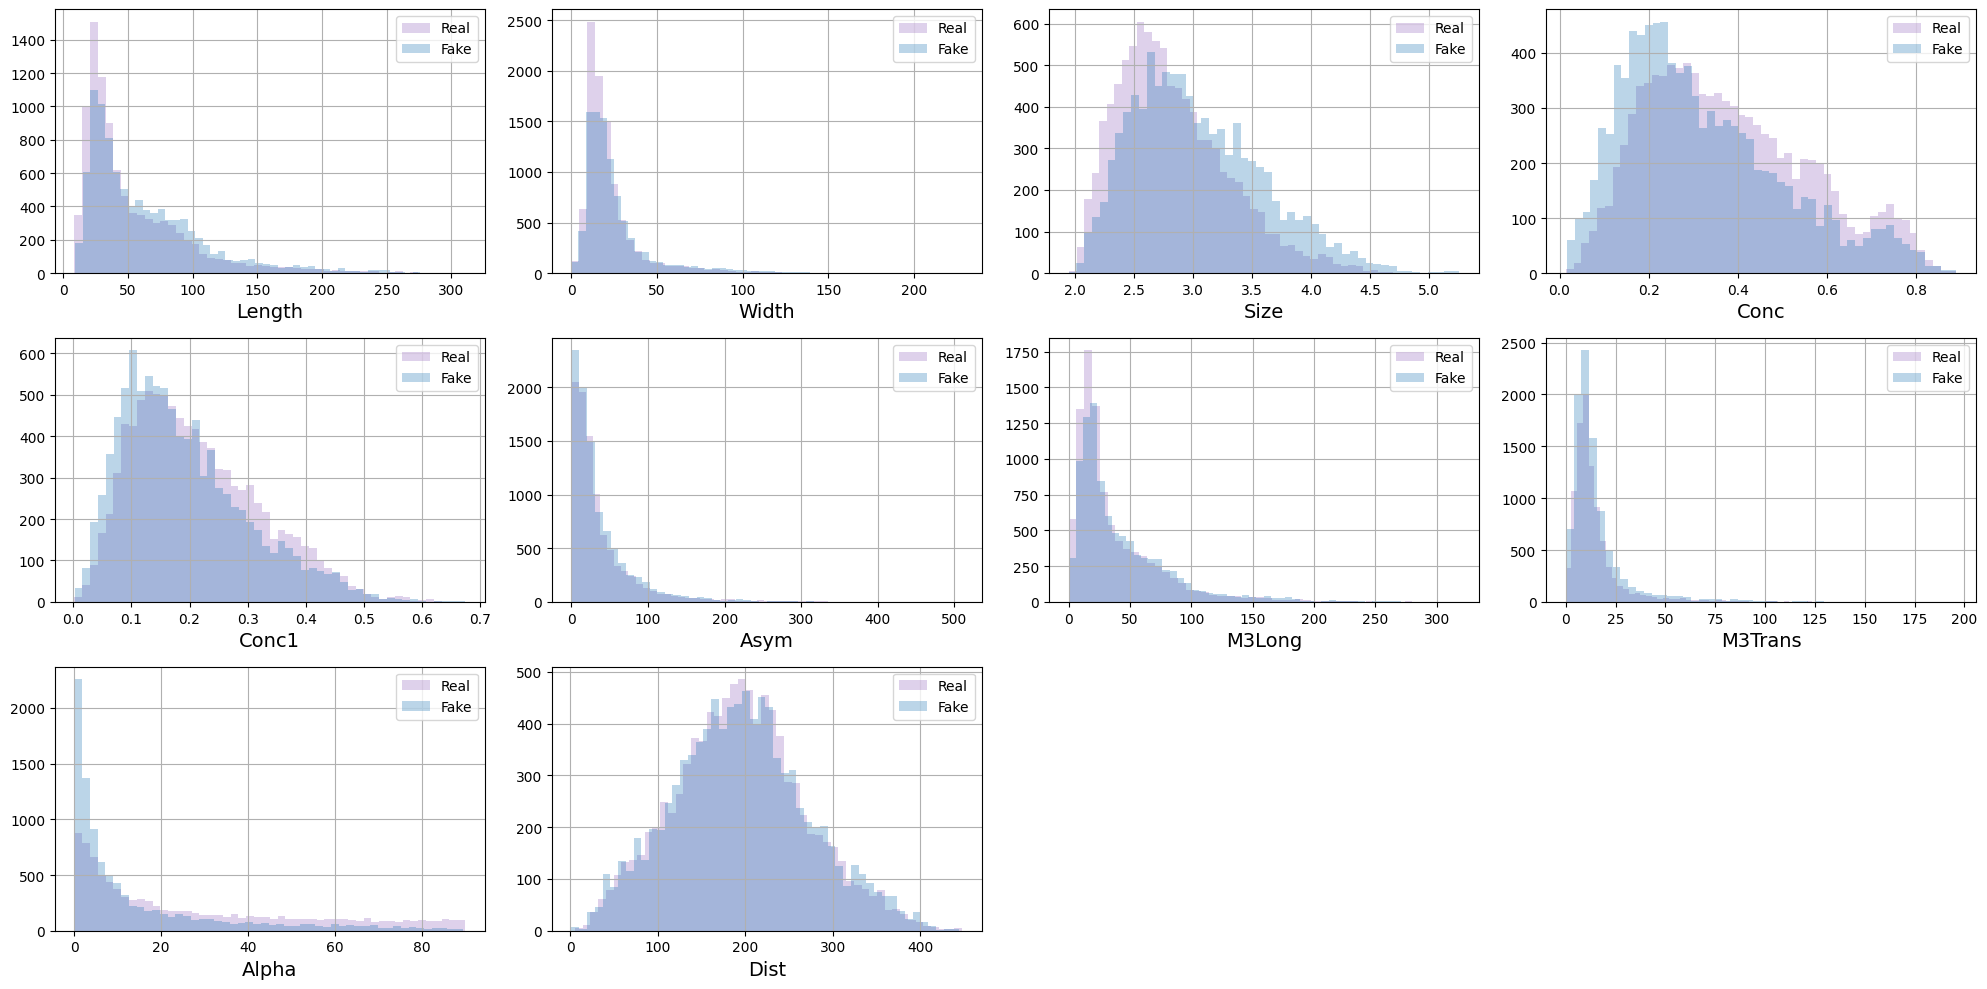

In [43]:
X_fake_test = generate_with_diffusion(diffusionFitter.model, y_test, latent_dim, noise_scheduler)
plot_hists(
    transformer.inverse_transform(X_test),
    transformer.inverse_transform(X_fake_test),
    names,
    label1 = "Real",
    label2 = "Fake",
    bins = 50
)

In [44]:
# собираем реальный и фейковые матрицы в одну
XX_train = np.concatenate((X_fake_train, X_train), axis = 0)
XX_test = np.concatenate((X_fake_test, X_test), axis = 0)

yy_train = np.array([0] * len(X_fake_train) + [1] * len(X_train))
yy_test = np.array([0] * len(X_fake_test) + [1] * len(X_test))

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

# обучаем классификатор
clf = GradientBoostingClassifier()
clf.fit(XX_train, yy_train)

# получаем прогнозы
yy_test_proba = clf.predict_proba(XX_test)[:, 1]

In [49]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(yy_test, yy_test_proba)
print("ROC AUC =", auc)

acc = accuracy_score(yy_test, clf.predict(XX_test))
print("Accuracy =", acc)

ROC AUC = 0.8011319702211741
Accuracy = 0.7218717139852786


Градиентный бустинг верно определяет, является ли объект настоящим, примерно в 72% случаев при ROC-AUС чуть больше 0.8. Этот результат однозначно лучше, чем полученный GAN, и достаточно хорош для столь простой архитектуры диффузионной модели, хотя и имеет потенциал к улучшению. \
По графикам также видно, что диффузионная модель научилась неплохо воспроизводить признаки: распределения отдельных координат сгенерированных и настоящих векторов совпадают с хорошей точностью.

## Отзыв

Поздравляю! Вы дошли до конца. Оставьте ваш отзыв ячейкой ниже или отправьте его в канал курса, нам будет очень интересно!

In [47]:
# ░░░░░▄▀▀▀▄░░░░░░░░
# ▄███▀░◐░░░▌░░░░░░░
# ░░░░▌░░░░░▐░░░░░░░
# ░░░░▐░░░░░▐░░░░░░░
# ░░░░▌░░░░░▐▄▄░░░░░
# ░░░░▌░░░░▄▀▒▒▀▀▀▀▄
# ░░░▐░░░░▐▒▒▒▒▒▒▒▒▀▀▄
# ░░░▐░░░░▐▄▒▒▒▒▒▒▒▒▒▒▀▄
# ░░░░▀▄░░░░▀▄▒▒▒▒▒▒▒▒▒▒▀▄
# ░░░░░░▀▄▄▄▄▄█▄▄▄▄▄▄▄▄▄▄▄▀▄
# ░░░░░░░░░░░▌▌▌▌░░░░░
# ░░░░░░░░░░░▌▌░▌▌░░░░░
# ░░░░░░░░░▄▄▌▌▄▌▌░░░░░